<h1> <div style="text-align: center"> Portfolio Applied Task - Credit Scoring  </div>

<div class="alert alert-block alert-warning">
<b> <ins> The aim of this task: </ins> </b>
<span style="font-family:Comic Sans MS"> To demonstrate the ability to perform intermediate-level data analysis and model building.</span>
</div>

# Table of Contents: <a class="anchor" id="main-bullet"></a>
* [1. Task Description](#first-bullet)
* [2. Setup Working Environment](#second-bullet)
* [3. Brief Data Overview](#third-bullet)
* [4. Exploratory data analysis](#fourth-bullet)
* [5. Feature engineering](#fifth-bullet)
* [6. Building a Model](#sixth-bullet)
* [7. Tuning the Model](#seventh-bullet)
* [8. Analyzing the most important features](#eighth-bullet)

<h1> <div style = "text-align: center"> <font color = "brown"> 1. Task Description </font> </div> <a class="anchor" id="first-bullet"></a>

<span style="font-family:Comic Sans MS">Forecasting the probability of borrower's default.</span>

<h1> <div style = "text-align: center"> <font color = "brown"> 2. Setup Working Environment </font> and Import data </div> <a class="anchor" id="second-bullet"></a>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, auc, accuracy_score, roc_auc_score,f1_score,log_loss,\
classification_report, roc_curve
import shap

import os
from IPython.display import display as dsp

import warnings
warnings.filterwarnings("ignore");

RAND = 10

In [2]:
from Overview_Func import overview, plot_density_overview, plot_hist_bins_overview
# overview - Custom function used to quickly generate an overview of the data.
# plot_density_overview - Custom function used to quickly look at the distribution of a specific column via graphs.

In [3]:
PATH = os.path.abspath(os.getcwd()) + "\\"

In [4]:
df = pd.read_csv(PATH + '/data.csv')

* [Return to the Table of Contents](#main-bullet)

<h1> <div style = "text-align: center"> 3. Brief Data <font color = "brown"> Overview </font> </div>  <a class="anchor" id="third-bullet"></a>

<h2> Variables Overview

* <b> client_id </b>- Client's identification
* <b> education </b>
* <b> sex </b>
* <b> age </b>
* <b> car </b> - If a borrower has a car or not
* <b> car_type </b>
* <b> decline_app_cnt </b> - Amount of previously declined applications
* <b> good_work </b> - Whether the job is labeled as 'good'
* <b> bki_request_cnt </b> - Amount of BKI requests
* <b> home_address </b>
* <b> work_address </b>
* <b> income </b>
* <b> foreign_passport </b> - Whether a borrower has a foreign passport
* <b> sna </b> - Connection of a borrower with the bank employees
* <b> first_time </b> - Duration of a borrower's information
* <b> score_bki </b>
* <b> region_rating </b>
* <b> app_date </b> - Date of the application submission
* <b> default </b> - Whether credit was labeled as defaulted

In [5]:
dsp(df.iloc[:, :9])
dsp(df.iloc[:, 9:])

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work
0,25905,01-Feb-14,SCH,M,62,Y,Y,0,0
1,63161,12-Mar-14,SCH,F,59,N,N,0,0
2,25887,01-Feb-14,SCH,M,25,Y,N,2,0
3,16222,23-Jan-14,SCH,F,53,N,N,0,0
4,101655,18-Apr-14,GRD,M,48,N,N,0,1
...,...,...,...,...,...,...,...,...,...
73794,54887,04-Mar-14,GRD,F,45,N,N,0,0
73795,76821,24-Mar-14,SCH,M,41,Y,Y,0,0
73796,103695,22-Apr-14,SCH,M,31,N,N,0,0
73797,861,04-Jan-14,SCH,F,29,N,N,0,1


,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,-2.008753,1,50,1,2,18000,4,1,N,0
1,-1.532276,3,50,2,3,19000,4,1,N,0
2,-1.408142,1,80,1,2,30000,1,4,Y,0
3,-2.057471,2,50,2,3,10000,1,3,N,0
4,-1.244723,1,60,2,3,30000,1,4,Y,0
...,...,...,...,...,...,...,...,...,...,...
73794,-1.792064,3,50,1,2,17000,4,4,N,0
73795,-2.058029,1,50,2,2,70000,1,4,N,0
73796,-1.512635,4,80,2,3,45000,2,2,N,0
73797,-1.479334,3,50,1,3,13000,2,3,N,1


In [6]:
overview(df)

-------------------------------------
CLIENT_ID (int64) 

 Max: 110147 Min: 1 
 Mean: 55137.97 Median: 55274.0 Std: 31841.92
 More than 2 Modes!
            - - - - - - -            
 73799 Unique values
 6 Unique value's length (in characters)
5    81.61
6     9.28
4     8.23
3     0.78
2     0.09
1     0.01
            - - - - - - -            
 100.0 % of Non-NaN and Non-Zero values 

            - - - - - - -            
 Only values with letters: 0.0 %
 Only values with numbers: 100.0 %
 Only values with letters and numbers: 0.0 %
-------------------------------------

-------------------------------------
APP_DATE (object) 

 Mode: 18-Mar-14
            - - - - - - -            
 120 Unique values
 1 Unique value's length (in characters)
9    100.0
            - - - - - - -            
 100.0 % of Non-NaN and Non-Zero values 

 Contains Duplicates values!
            - - - - - - -            
 Only values with letters: 0.0 %
 Only values with numbers: 0.0 %
 Only values with lett

 100.0 % of Non-NaN and Non-Zero values 

 Contains Duplicates values!
            - - - - - - -            
 Only values with letters: 0.0 %
 Only values with numbers: 100.0 %
 Only values with letters and numbers: 0.0 %
-------------------------------------

-------------------------------------
INCOME (int64) 

 Max: 1000000 Min: 1000 
 Mean: 41099.78 Median: 30000.0 Std: 46166.32
 Mode: 30000
            - - - - - - -            
 966 Unique values
 4 Unique value's length (in characters)
5    90.20
6     6.11
4     3.67
7     0.01
            - - - - - - -            
 100.0 % of Non-NaN and Non-Zero values 

 Contains Duplicates values!
            - - - - - - -            
 Only values with letters: 0.0 %
 Only values with numbers: 100.0 %
 Only values with letters and numbers: 0.0 %
-------------------------------------

-------------------------------------
SNA (int64) 

 Max: 4 Min: 1 
 Mean: 1.73 Median: 1.0 Std: 1.12
 Mode: 1
            - - - - - - -            
 4 Unique 

<h3> Making some quick, small adjustments to the data

In [7]:
# Replacing missing values with a mode
ed_mode = df.education.mode()[0]
df.education = df.education.fillna(ed_mode)

In [8]:
# Changing the type of the columns
df[['home_address', 'work_address']] = df[['home_address', 'work_address']].astype(object)

* [Return to the Table of Contents](#main-bullet)

<h1> <div style = "text-align: center"> <font color = "brown"> 4. Exploratory data analysis </font> </div>  <a class="anchor" id="fourth-bullet"></a>

<h2> Hypothesis:

* The age of 'good' borrowers vs 'bad' (The older the borrower, the less the chance of him/her being defaulted)
* The level of education has an influence on whether the borrower is 'good' or 'bad', with more educated borrowers having less chance of being defaulted vs less educated.
* With <b> good_work = 0 </b> the risk of <b> defaulted = 1 </b> increases.
* The <b> income </b> of 'good' borrowers is higher than 'bad' borrowers.
* <b> score_bki </b> is directly correlated with default, the less it is, the higher is the chance of a client to pay his loan back.

<h2> Target

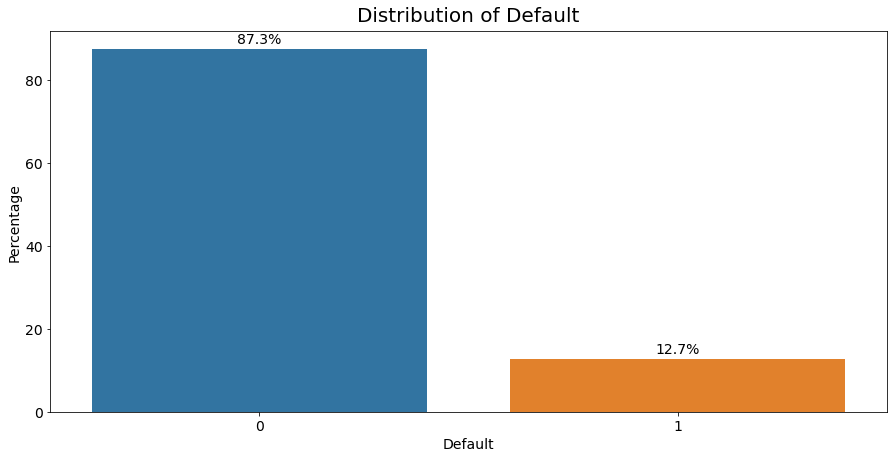

We have the disbalance of classes in this dataset, when building a model, we need to take it into the account.


In [9]:
norm_target = (df
               .default
               .value_counts(normalize=True)
               .mul(100)
               .rename('percent')
               .reset_index())

plt.figure(figsize=(15, 7))
ax = sns.barplot(x='index', y='percent', data=norm_target)

for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(percentage,  
                (p.get_x() + p.get_width() / 2., p.get_height()),  # координата xy
                ha='center', 
                va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=14)

plt.title('Distribution of Default', y = 1.01, fontsize=20)

plt.xlabel('Default', fontsize=14)
plt.ylabel('Percentage', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

plt.show()
print("We have the disbalance of classes in this dataset, when building a model, we need to take it into the account.")

<h2> Age

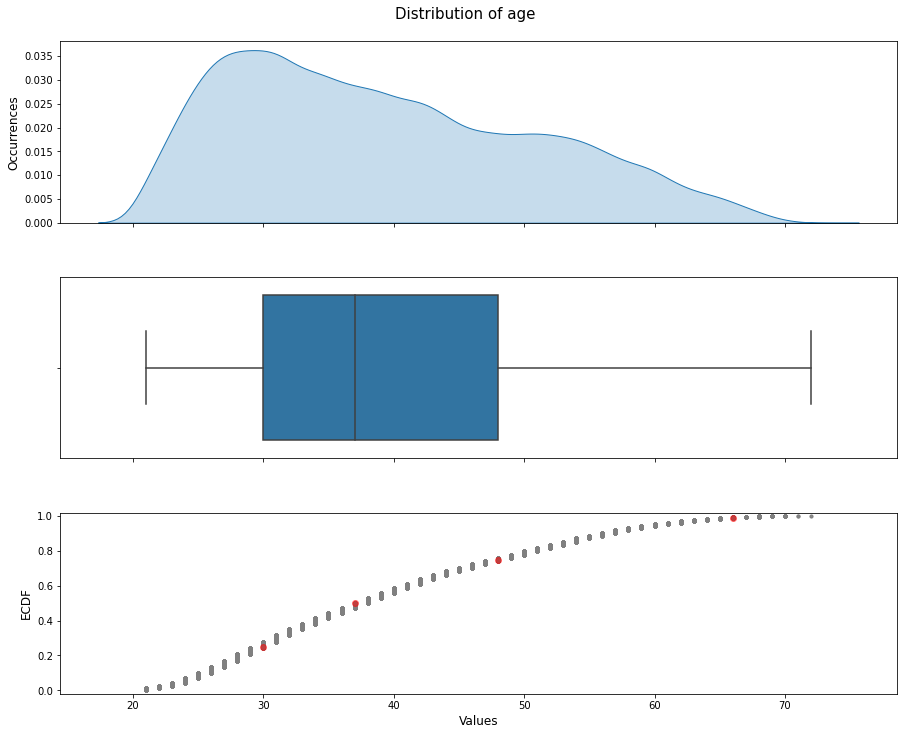

In [10]:
plot_density_overview(df["age"])

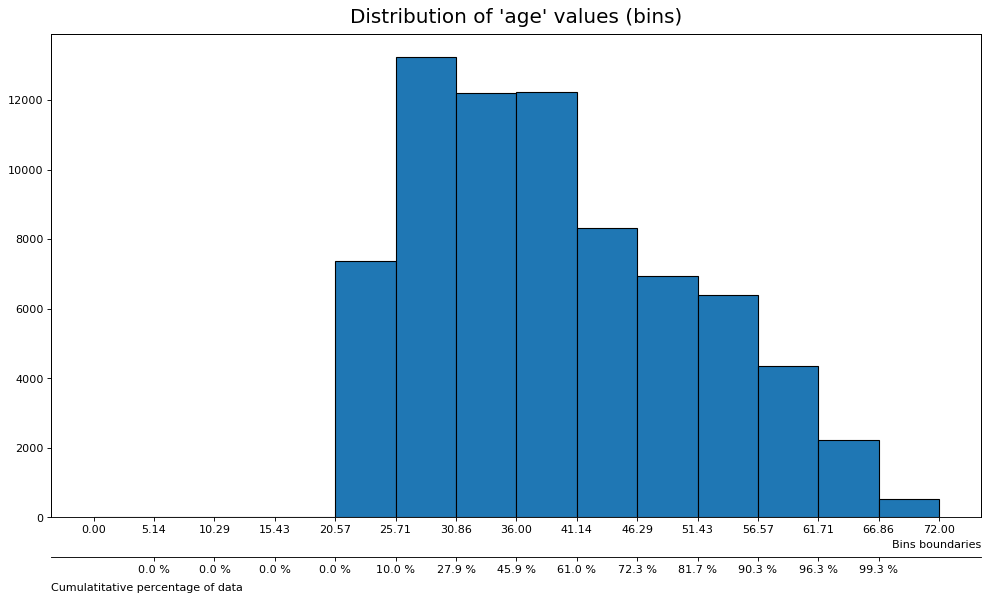

In [11]:
plot_hist_bins_overview(df["age"])

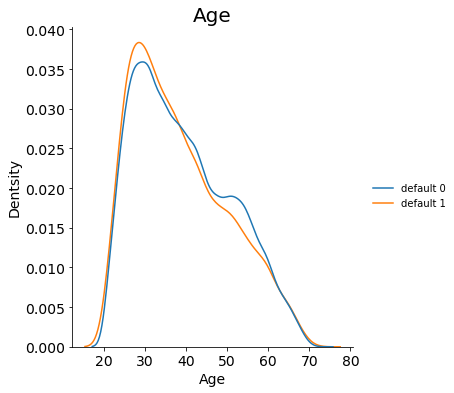

In [12]:
sns.displot(
    {
        "default 0": df[df.default == 0].age,
        "default 1": df[df.default == 1].age
    },
    kind="kde",
    common_norm=False
)

plt.title('Age', fontsize=20)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Dentsity', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

In [13]:
proxy = df.groupby('default').agg({"age": ["mean", "median", lambda x: x.value_counts().index[0]]}).reset_index()
proxy.columns = ["default", "mean_age", "median_age", "mode_age"]
proxy.round(1)

,default,mean_age,median_age,mode_age
0,0,39.4,38,31
1,1,38.5,36,26


There is a difference between the age of borrowers in accordance to default status,our previous hypothesis has been confirmed.

<h2> Education

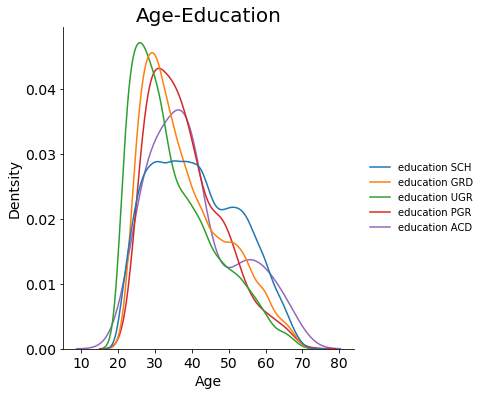

In [14]:
sns.displot(
    {
        "education SCH": df[df.education == 'SCH'].age,
        "education GRD": df[df.education == 'GRD'].age,
        "education UGR": df[df.education == 'UGR'].age,
        "education PGR": df[df.education == 'PGR'].age,
        "education ACD": df[df.education == 'ACD'].age,
    },
    kind="kde",
    common_norm=False
)

plt.title('Age-Education', fontsize=20)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Dentsity', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

If we take ACD education, it is leaned towards right, which is self-explanotary in itself. UGR education is leaned towards left, which implies that the population there is the youngest one, which could lead us to assume that they should be the 'bad' borrowers, based on the previous graph.

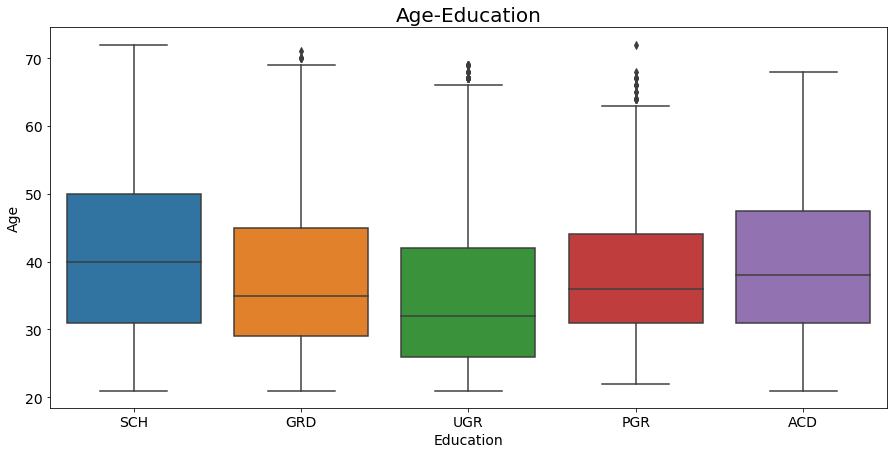

In [15]:
plt.figure(figsize=(15, 7))

sns.boxplot(x='education', y='age', data=df)

plt.title('Age-Education', fontsize=20)
plt.ylabel('Age', fontsize=14)
plt.xlabel('Education', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

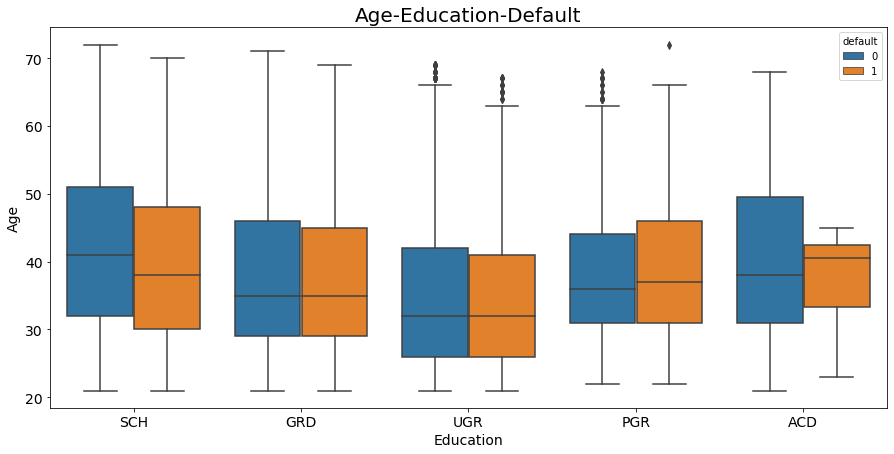

In [16]:
plt.figure(figsize=(15, 7))

sns.boxplot(x='education', y='age', hue='default', data=df)

plt.title('Age-Education-Default', fontsize=20)
plt.ylabel('Age', fontsize=14)
plt.xlabel('Education', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

Interesting, that if we take the level of education PGR and ACD, the mean age of 'bad' borrowers is higher, than the 'good' ones, but the dispersion in both cases is high. Perhaps, if we take some age interval of 30 to 50 years old, within this group, the influence would not really be significant on the ability to pay back.

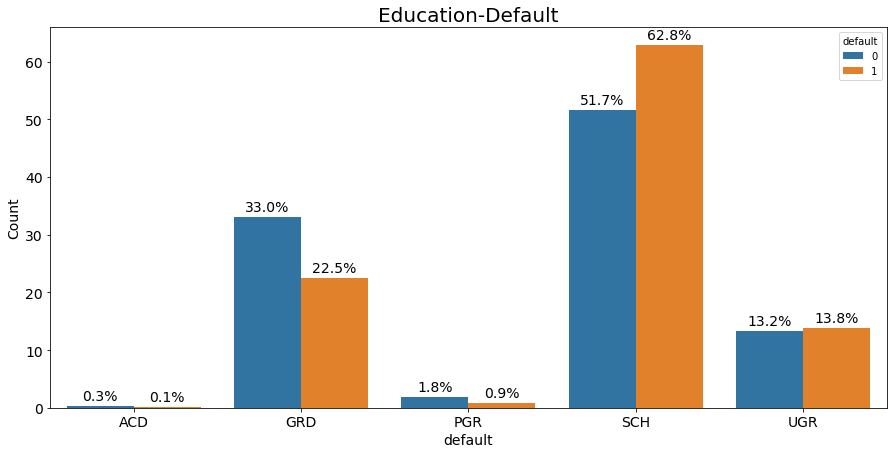

In [17]:
plt.figure(figsize=(15, 7))

educ_def = (df.groupby(['default'])['education']
            .value_counts(normalize=True)
            .rename('percentage')
            .mul(100)
            .reset_index()
            .sort_values('education'))

ax = sns.barplot(x="education", y="percentage", hue="default", data=educ_def)

for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(percentage,  # текст
                (p.get_x() + p.get_width() / 2., p.get_height()),  # координата xy
                ha='center',  # центрирование
                va='center',
                xytext=(0, 10),
                textcoords='offset points',  # точка смещения относительно координаты
                fontsize=14)

plt.title('Education-Default', fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('default', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

We observe, that the percentage of 'bad' borrowers is higher with the SCH education, for UGR the difference is insignificant. Most likely, in this case, the influence is not caused by the age, but by the education. Also, could be noticed, that GRD is more stable when it comes to paying the loan back.

In [18]:
proxy = df.groupby('education').agg({"age": ["mean", "median", lambda x: x.value_counts().index[0]]}).reset_index()
proxy.columns = ["education", "mean_education", "median_education", "mode_education"]
proxy.round(1)

,education,mean_education,median_education,mode_education
0,ACD,40.1,38,36
1,GRD,38.1,35,28
2,PGR,38.3,36,28
3,SCH,41.1,40,42
4,UGR,34.9,32,27


<h2> Correlation

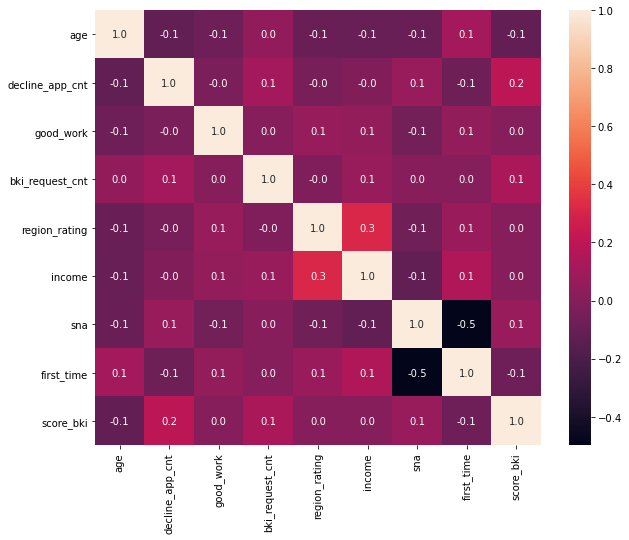

In [19]:
num_cols = ['age', 'decline_app_cnt', 'good_work', 'bki_request_cnt',
       'region_rating', 'income', 'sna', 'first_time', 'score_bki']

plt.figure(figsize=(10, 8))

sns.heatmap(df[num_cols].corr(method='spearman'), annot=True, fmt=".1f");

<h2> Income

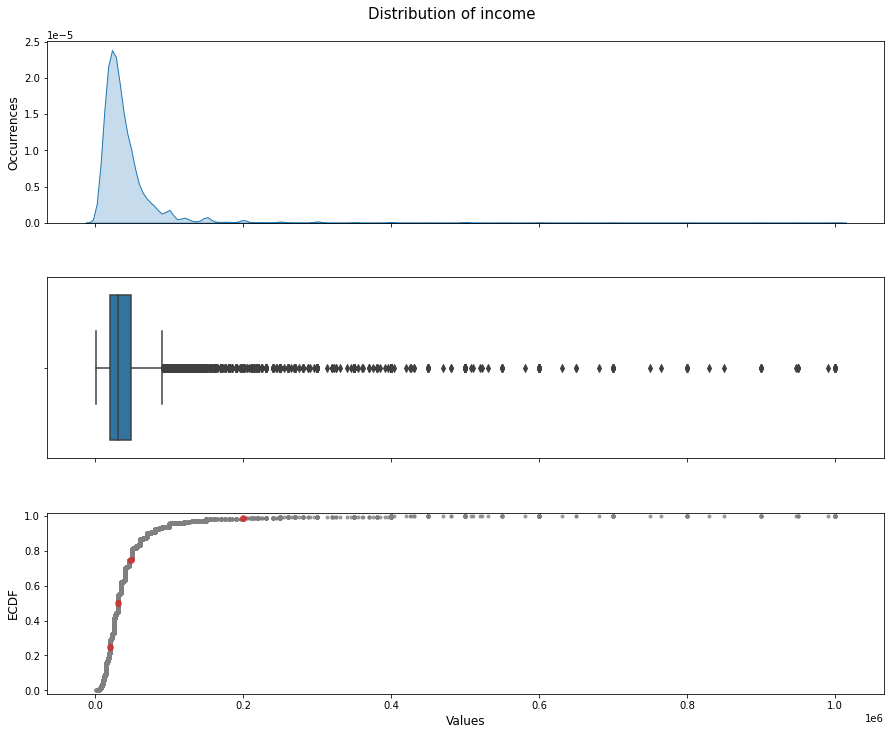

In [20]:
plot_density_overview(df["income"])

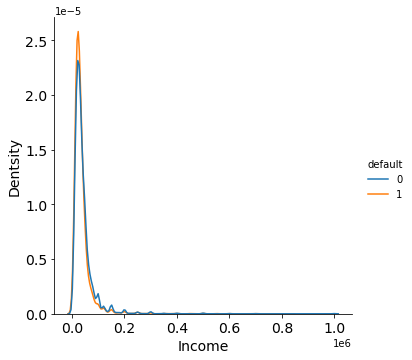

In [21]:
sns.displot(df, x='income', hue='default', kind="kde", common_norm=False)

plt.xlabel('Income', fontsize=14)
plt.ylabel('Dentsity', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

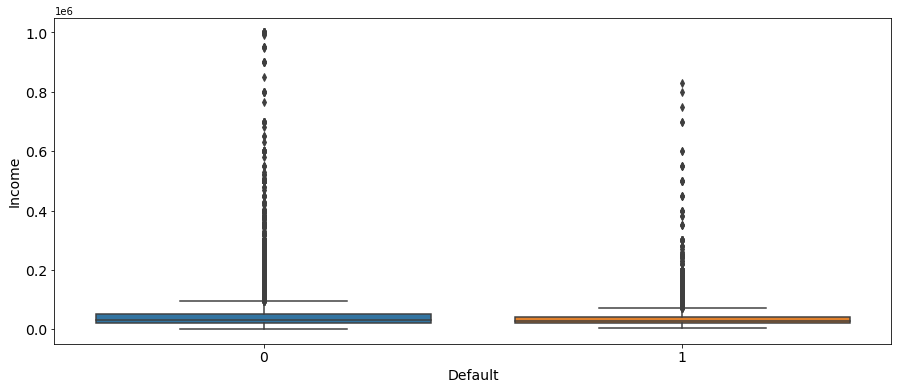

In [22]:
plt.figure(figsize=(15, 6))

sns.boxplot(x='default', y='income', data=df)

plt.ylabel('Income', fontsize=14)
plt.xlabel('Default', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

In [23]:
proxy = df.groupby('default').agg({"income": ["mean", "median", lambda x: x.value_counts().index[0]]}).reset_index()
proxy.columns = ["default", "mean_income", "median_income", "mode_income"]
proxy.round(1)

,default,mean_income,median_income,mode_income
0,0,41799.7,30000,30000
1,1,36288.1,28000,30000


In [24]:
df_income = df.copy()
df_income.income = np.log(df.income+1)

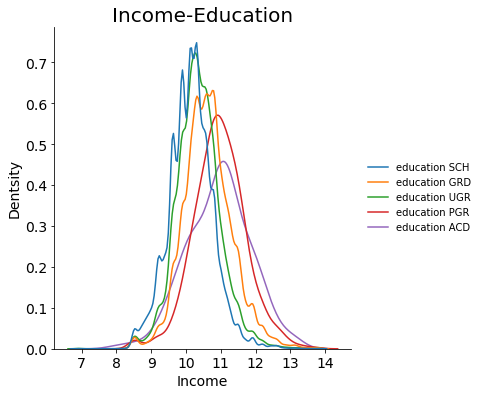

In [25]:
sns.displot(
    {
        "education SCH": df_income[df_income.education == 'SCH'].income,
        "education GRD": df_income[df_income.education == 'GRD'].income,
        "education UGR": df_income[df_income.education == 'UGR'].income,
        "education PGR": df_income[df_income.education == 'PGR'].income,
        "education ACD": df_income[df_income.education == 'ACD'].income,
    },
    kind="kde",
    common_norm=False
)

plt.title('Income-Education', fontsize=20)
plt.xlabel('Income', fontsize=14)
plt.ylabel('Dentsity', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

The graph above shows; with regard to the education, what kind of income is distributed within each group.

* [Return to the Table of Contents](#main-bullet)

<h1> <div style = "text-align: center"> <font color = "brown"> 5. Feature engineering </font> </div> <a class="anchor" id="fifth-bullet"></a>

In [26]:
df.columns

Index(['client_id', 'app_date', 'education', 'sex', 'age', 'car', 'car_type',
       'decline_app_cnt', 'good_work', 'score_bki', 'bki_request_cnt',
       'region_rating', 'home_address', 'work_address', 'income', 'sna',
       'first_time', 'foreign_passport', 'default'],
      dtype='object')

In [27]:
num_cols = ['age', 'decline_app_cnt', 'score_bki',
            'bki_request_cnt', 'income', 'first_time','region_rating']

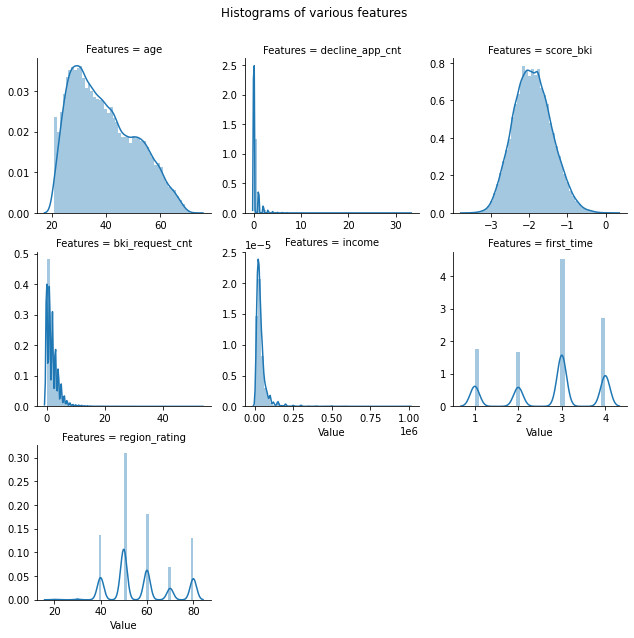

In [28]:
numeric_features = df[num_cols]

numeric_features = numeric_features.stack().reset_index().rename(
    columns={"level_1": "Features", 0: "Value"})

ax = sns.FacetGrid(data=numeric_features, col="Features",
                  col_wrap=3, sharex=False, sharey=False)
ax = ax.map(sns.distplot, "Value")

plt.subplots_adjust(top=0.9)
plt.suptitle("Histograms of various features");

In [29]:
for i in ['age', 'decline_app_cnt', 'bki_request_cnt', 'income']:
    df[i] = np.log(df[i]+1)

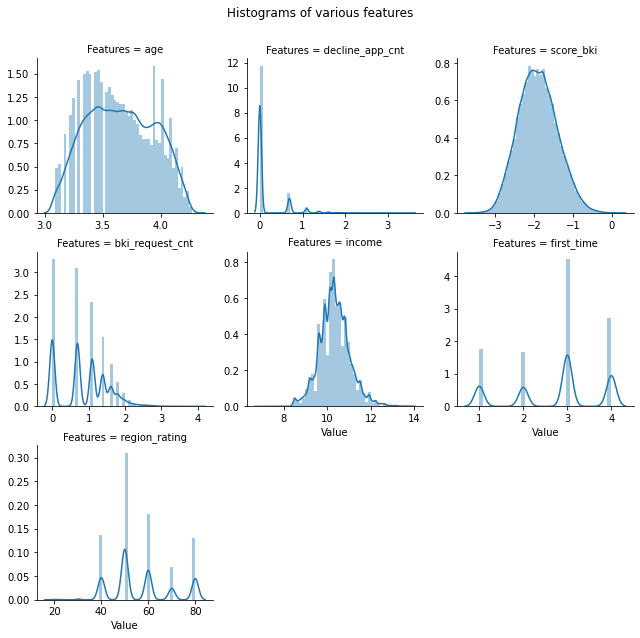

In [30]:
numeric_features = df[num_cols]

numeric_features = numeric_features.stack().reset_index().rename(
    columns={"level_1": "Features", 0: "Value"})

ax = sns.FacetGrid(data=numeric_features, col="Features",
                  col_wrap=3, sharex=False, sharey=False)
ax = ax.map(sns.distplot, "Value")

plt.subplots_adjust(top=0.9)
plt.suptitle("Histograms of various features");

In [31]:
# New Feature - Month
df['month'] = df['app_date'].str[3:6]
df.drop(['app_date'],  axis=1, inplace=True)

In [32]:
# Average income with regard to region

mean_inc_reg = df.groupby('region_rating')['income'].median().to_dict()
df['mean_income_region'] = df['region_rating'].map(mean_inc_reg)

In [33]:
# Average income with regard to age

mean_inc_age = df.groupby('age')['income'].median().to_dict()
df['mean_income_age'] = df['age'].map(mean_inc_age)

In [34]:
# Average score bki with regard to age

mean_bki_age = df.groupby('age')['score_bki'].median().to_dict()
df['mean_bki_age'] = df['age'].map(mean_bki_age)

In [35]:
dsp(df.iloc[:5, :12])
dsp(df.iloc[:5, 12:])

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address
0,25905,SCH,M,4.143135,Y,Y,0.000000,0,-2.008753,0.693147,50,1
1,63161,SCH,F,4.094345,N,N,0.000000,0,-1.532276,1.386294,50,2
2,25887,SCH,M,3.258097,Y,N,1.098612,0,-1.408142,0.693147,80,1
3,16222,SCH,F,3.988984,N,N,0.000000,0,-2.057471,1.098612,50,2
4,101655,GRD,M,3.891820,N,N,0.000000,1,-1.244723,0.693147,60,2


,work_address,income,sna,first_time,foreign_passport,default,month,mean_income_region,mean_income_age,mean_bki_age
0,2,9.798183,4,1,N,0,Feb,10.126671,9.903538,-1.981476
1,3,9.852247,4,1,N,0,Mar,10.126671,9.998843,-1.994864
2,2,10.308986,1,4,Y,0,Feb,10.757924,10.308986,-1.814637
3,3,9.210440,1,3,N,0,Jan,10.126671,10.212803,-1.993905
4,3,10.308986,1,4,Y,0,Apr,10.308986,10.308986,-1.988764


In [36]:
cat_cols = ['education', 'sex', 'car', 'car_type', 'good_work', 'home_address', 'work_address',
       'foreign_passport', 'sna', 'month']

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   client_id           73799 non-null  int64  
 1   education           73799 non-null  object 
 2   sex                 73799 non-null  object 
 3   age                 73799 non-null  float64
 4   car                 73799 non-null  object 
 5   car_type            73799 non-null  object 
 6   decline_app_cnt     73799 non-null  float64
 7   good_work           73799 non-null  int64  
 8   score_bki           73799 non-null  float64
 9   bki_request_cnt     73799 non-null  float64
 10  region_rating       73799 non-null  int64  
 11  home_address        73799 non-null  object 
 12  work_address        73799 non-null  object 
 13  income              73799 non-null  float64
 14  sna                 73799 non-null  int64  
 15  first_time          73799 non-null  int64  
 16  fore

In [38]:
df["good_work"] = df["good_work"].astype(int)
df["region_rating"] = df["region_rating"].astype(int)
df["sna"] = df["sna"].astype(int)
df["first_time"] = df["first_time"].astype(int)

In [39]:
num_cols = list(df.dtypes[df.dtypes == float].index) + list(df.dtypes[df.dtypes == int].index)[:]
num_cols

['age',
 'decline_app_cnt',
 'score_bki',
 'bki_request_cnt',
 'income',
 'mean_income_region',
 'mean_income_age',
 'mean_bki_age',
 'good_work',
 'region_rating',
 'sna',
 'first_time']

* [Return to the Table of Contents](#main-bullet)

<h1> <div style = "text-align: center"> <font color = "brown"> 6. Building a Model </font> </div> <a class="anchor" id="sixth-bullet"></a>

In [40]:
df_label = pd.get_dummies(df, columns=cat_cols,
                          drop_first=True).drop('client_id', axis=1)

In [41]:
dsp(df_label.iloc[:5, :10])
dsp(df_label.iloc[:5, 10:20])
dsp(df_label.iloc[:5, 20:])

,age,decline_app_cnt,score_bki,bki_request_cnt,region_rating,income,first_time,default,mean_income_region,mean_income_age
0,4.143135,0.000000,-2.008753,0.693147,50,9.798183,1,0,10.126671,9.903538
1,4.094345,0.000000,-1.532276,1.386294,50,9.852247,1,0,10.126671,9.998843
2,3.258097,1.098612,-1.408142,0.693147,80,10.308986,4,0,10.757924,10.308986
3,3.988984,0.000000,-2.057471,1.098612,50,9.210440,3,0,10.126671,10.212803
4,3.891820,0.000000,-1.244723,0.693147,60,10.308986,4,0,10.308986,10.308986


,mean_bki_age,education_GRD,education_PGR,education_SCH,education_UGR,sex_M,car_Y,car_type_Y,good_work_1,home_address_2
0,-1.981476,0,0,1,0,1,1,1,0,0
1,-1.994864,0,0,1,0,0,0,0,0,1
2,-1.814637,0,0,1,0,1,1,0,0,0
3,-1.993905,0,0,1,0,0,0,0,0,1
4,-1.988764,1,0,0,0,1,0,0,1,1


,home_address_3,work_address_2,work_address_3,foreign_passport_Y,sna_2,sna_3,sna_4,month_Feb,month_Jan,month_Mar
0,0,1,0,0,0,0,1,1,0,0
1,0,0,1,0,0,0,1,0,0,1
2,0,1,0,1,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,1,0
4,0,0,1,1,0,0,0,0,0,0


In [42]:
X = df_label.drop('default', axis=1)
y = df_label['default']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, shuffle=True, random_state=RAND)

<h2> Baseline

In [43]:
lr = LogisticRegression(class_weight = 'balanced')
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
y_score = lr.predict_proba(X_test)[:,1]

In [44]:
print('roc-auc:', roc_auc_score(y_test, y_score))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))
print('logloss:', log_loss(y_test, y_pred))

roc-auc: 0.7293699377728979
precision: 0.23074613421408197
recall: 0.6559965855740504
f1: 0.3414038205242115
logloss: 11.101303043851093


If bank, prefers to predict more 'bad' clients, in order to avoid big losses, we need to be guided by recall metric, if we compare with baseline and other algorithms, otherwise precision.

In [45]:
metrics = pd.DataFrame(
    index=['roc-auc', 'precision', 'recall', 'f1', 'logloss'])

metrics['Baseline_LR'] = [roc_auc_score(y_test, y_score),
                          precision_score(y_test, y_pred),
                          recall_score(y_test, y_pred),
                          f1_score(y_test, y_pred),
                          log_loss(y_test, y_pred)]

In [46]:
metrics

,Baseline_LR
roc-auc,0.729370
precision,0.230746
recall,0.655997
f1,0.341404
logloss,11.101303


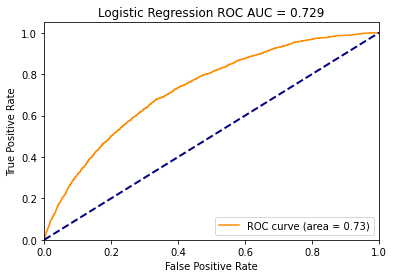

In [47]:
fpr, tpr, thresholds = roc_curve(y_test, y_score)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.legend(loc="lower right")
plt.show()

* [Return to the Table of Contents](#main-bullet)

<h1> <div style = "text-align: center"> <font color = "brown"> 7. Tuning the Model </font> </div> <a class="anchor" id="seventh-bullet"></a>

In [48]:
parameters_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': np.linspace(1, 1000, num=5),
    'solver': ['sag', 'saga', 'lbfgs'],
    'l1_ratio': [0.25, 0.5, 0.75],
    'max_iter': np.arange(100, 500, 100)
}

lr = LogisticRegression(class_weight='balanced')
cv = StratifiedKFold(n_splits=3, shuffle=True)
grid_cv = GridSearchCV(lr, parameters_grid,
                       scoring='roc_auc', cv=cv, verbose=2)

In [49]:
%%time
#grid_cv.fit(X_train, y_train)

Wall time: 0 ns


In [50]:
# print(grid_cv.best_score_)
# print(grid_cv.best_params_)

In [51]:
best_params = {'C': 500.5, 
               'l1_ratio': 0.25,
               'max_iter': 400, 
               'penalty': 'l2', 
               'solver': 'lbfgs'}

In [52]:
lr_gr = LogisticRegression(**best_params, class_weight='balanced')
lr_gr.fit(X_train, y_train)

y_pred_gr = lr_gr.predict(X_test)
y_score_gr = lr_gr.predict_proba(X_test)[:,1]

In [53]:
print('roc-auc:', roc_auc_score(y_test, y_score_gr))
print('precision:', precision_score(y_test, y_pred_gr))
print('recall:', recall_score(y_test, y_pred_gr))
print('f1:', f1_score(y_test, y_pred_gr))
print('logloss:', log_loss(y_test, y_pred_gr))

roc-auc: 0.729796343546642
precision: 0.23192544716669172
recall: 0.6585574050362782
f1: 0.34304135171187194
logloss: 11.06386202909433


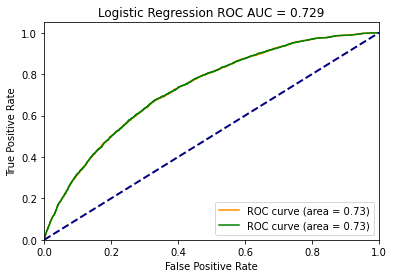

In [54]:
fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, y_score_gr)

roc_auc_2 = auc(fpr_2, tpr_2)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot(fpr_2, tpr_2, color='green', label='ROC curve (area = %0.2f)' % roc_auc_2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.legend(loc="lower right")
plt.show()

In [55]:
metrics['Grid_LR'] = [roc_auc_score(y_test, y_score_gr),
                      precision_score(y_test, y_pred_gr),
                      recall_score(y_test, y_pred_gr),
                      f1_score(y_test, y_pred_gr),
                      log_loss(y_test, y_pred_gr)]

In [56]:
metrics[:-1].style.highlight_max(axis=1, color='lightblue')

,Baseline_LR,Grid_LR
roc-auc,0.729370,0.729796
precision,0.230746,0.231925
recall,0.655997,0.658557
f1,0.341404,0.343041


* [Return to the Table of Contents](#main-bullet)

<h1> <div style = "text-align: center"> <font color = "brown"> 8. Analyzing the most important features </font> </div> <a class="anchor" id="eighth-bullet"></a>

In [57]:
explainer = shap.LinearExplainer(lr_gr, X_train, feature_dependence="independent")
shap_values = explainer(X_test)

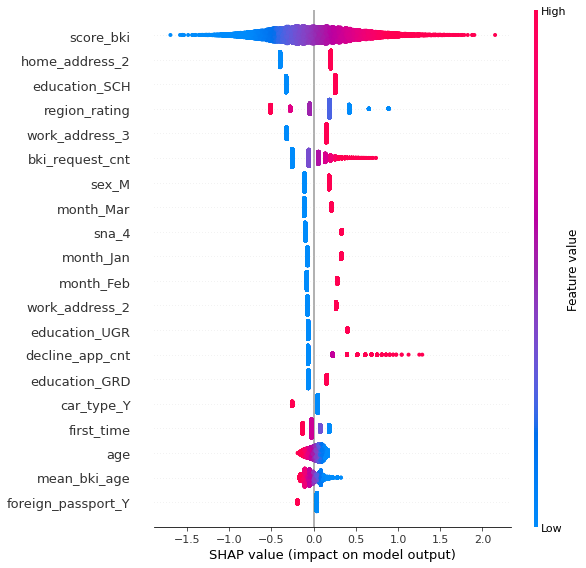

In [58]:
# summary plot
shap.summary_plot(shap_values, X_test)

Features located in accordance to how significant are they at Y axis, at the X axis the shap values are located. 

Colour corresponds to the relevant feature: red - high, blue - low.
    
Example:
* The more is <b> score_bki </b>, the higher the probability of <b> default </b>.
* The higher the <b> age</b>, the lower the probability of <b> default </b>.

In [59]:
lr_gr.coef_

array([[-0.29824348,  0.42042535,  1.01283136,  0.2836687 , -0.02331461,
        -0.03567887, -0.10479793, -0.26023373,  0.29409574, -1.2290124 ,
         0.21703797,  0.10775166,  0.5831931 ,  0.46918406,  0.29090382,
         0.00306316, -0.30229378, -0.21703857,  0.60265679,  0.09907026,
         0.34034517,  0.47073483, -0.23021468,  0.26007416,  0.16627888,
         0.43077994,  0.36051066,  0.39921691,  0.32272105]])

In [60]:
feature_imp = pd.DataFrame()
feature_imp['feature'] = X.columns
feature_imp['imp'] = lr_gr.coef_[0]
feature_imp = feature_imp.sort_values(by='imp', ascending=False)

In [61]:
feature_imp

,feature,imp
2,score_bki,1.012831
18,home_address_2,0.602657
12,education_SCH,0.583193
21,work_address_3,0.470735
13,education_UGR,0.469184
25,sna_4,0.430780
1,decline_app_cnt,0.420425
27,month_Jan,0.399217
26,month_Feb,0.360511
20,work_address_2,0.340345


In [62]:
df_label.groupby('default')[['score_bki']].median()

,score_bki
default,
0,-1.956982
1,-1.683857


In [63]:
vals = np.abs(shap_values.values).mean(0)
feature_names = X_train

feature_importance = pd.DataFrame(list(zip(feature_names, vals)),
                                  columns=['col_name', 'feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'],
                               ascending=False, inplace=True)

In [64]:
cols_show = list(set(feature_importance.col_name[:15]) & set(num_cols))
cols_show

['region_rating', 'score_bki', 'bki_request_cnt', 'decline_app_cnt']

In [65]:
df_label[cols_show + ['default']].groupby('default')[cols_show].mean().T

default,0,1
region_rating,57.169044,53.677977
score_bki,-1.938048,-1.675637
bki_request_cnt,0.858317,1.013421
decline_app_cnt,0.135281,0.270484


* [Return to the Table of Contents](#main-bullet)